# LAB 8. Clustering

In this assignment, we'll learn how to implement different clustering methods such as K-means, Hierarchical clustering, and DBSCAN.

<table>
    <tr>
        <td width="30%" style="text-align: center"><strong>K-means</strong></td>
        <td width="34%" style="text-align: center"><strong>EM clustering</strong></td>
        <td width="30%" style="text-align: center"><strong>DBSCAN (here, outperforms K-means and EM)</strong></td>
    </tr>
    <tr>
        <td><a href="https://en.wikipedia.org/wiki/K-means_clustering"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/512px-K-means_convergence.gif"></a></td>
        <td><a href="https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm"><img src="https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif"></a></td>
        <td><a href="https://en.wikipedia.org/wiki/DBSCAN"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/DBSCAN-density-data.svg/500px-DBSCAN-density-data.svg.png"></a></td>        
    </tr>    
</table>

## Outline
Click on these links to jump to a particular section of this assignment.
- [1. Generate and plot data](#1)
- [2. Clustering](#2)
    - [2.1. K-means](#2-1)
    - [2.2. Hierarchical clustering](#2-2)
    - [2.3. DBSCAN](#2-3)
- [3. Clustering performance measurement](#3)
- [4. Elbow method for K-means](#4)
- [5. Dendrogram for Hierarchical clustering](#5)
- [6. YOUR TURN](#6) 
  

## Rreferences
- [DBSCAN clustering for data shapes k-means can’t handle well (in Python)](https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea)
- [Unsupervised Learning With Python — K- Means and Hierarchical Clustering](https://medium.com/datadriveninvestor/unsupervised-learning-with-python-k-means-and-hierarchical-clustering-f36ceeec919c)
- [Hierarchical Clustering with Python and Scikit-Learn](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)
- [Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)
- [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
- [scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
- [scipy.cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [Rand index](https://en.wikipedia.org/wiki/Rand_index)
- [Rand Index in Statistics - A Worked Example - Cluster Analysis (video)](https://youtu.be/6rjTIwn0yWI)
- [Adjusted Rand index](https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-score)


<a name="1"></a>
## 1. Generate and plot data

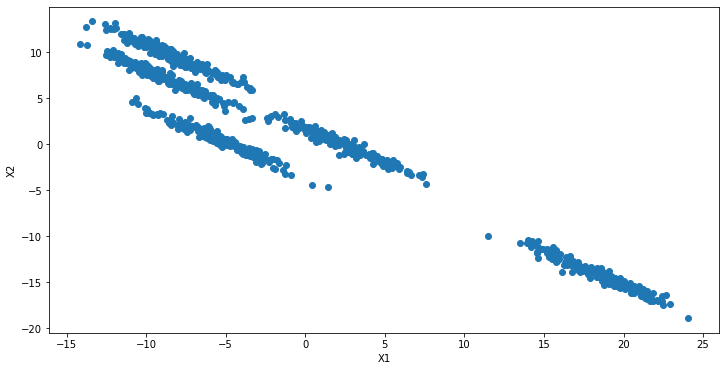

In [ ]:
# Load useful libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set the number of clusters
NUMBER_OF_CLUSTERS = 5

# Generate some random cluster data
X, y = make_blobs(random_state=7, n_samples=1000, centers=NUMBER_OF_CLUSTERS)

# Transform the data to be stretched
random_state = np.random.RandomState(2)
transformation = random_state.normal(size=(2, 2))
X = np.dot(X, transformation)

# Plot the generated data
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

<a name="2"></a>
## 2. Clustering

<a name="2-1"></a>
### 2.1. K-means

Please review [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Some important parameters:
+ **n_clusters** (default=8). The number of clusters to form as well as the number of centroids to generate.

+ **n_init** (default=10). Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of `n_init` consecutive runs in terms of inertia.

+ **max_iter** (default=300). Maximum number of iterations of the k-means algorithm for a single run.

+ **algorithm** (default=”auto”). K-means algorithm to use. The classical EM-style algorithm is `“full”`. The `“elkan”` variation is more efficient by using the triangle inequality, but currently doesn’t support sparse data. `“auto”` chooses `“elkan”` for dense data and `“full”` for sparse data.

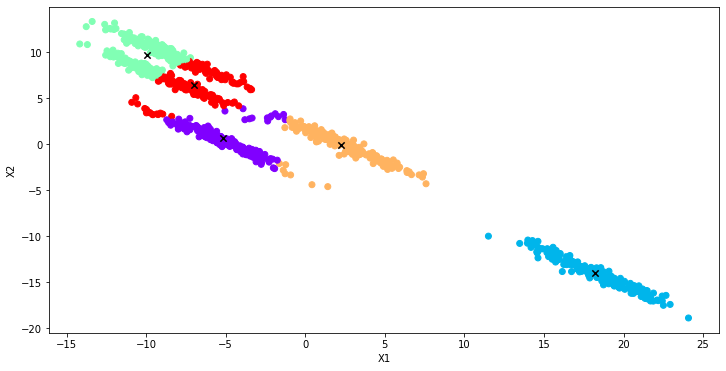

In [ ]:
from sklearn.cluster import KMeans

# Cluster the data into five clusters
kmeans = KMeans(n_clusters=NUMBER_OF_CLUSTERS, n_init=10, max_iter=300, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", c="k", s=40)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

<a name="2-2"></a>
### 2.2. Hierarchical clustering

[Notice](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/) that there are two types of hierarchical clustering: **Agglomerative** and **Divisive**. In the former, data points are clustered using a **bottom-up approach** starting with individual data points, while in the latter **top-down approach** is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

Here we will focus on agglomerative clustering that involves the bottom-up approach.

**Following are the steps involved in agglomerative clustering:**
1. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
5. Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.

There are different ways to find distance between the clusters. The distance itself can be [Euclidean](https://en.wikipedia.org/wiki/Euclidean_distance) or [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry). Following are some of the options to measure distance between two clusters:

+ Measure the distance between the closes points of two clusters.
+ Measure the distance between the farthest points of two clusters.
+ Measure the distance between the centroids of two clusters.
+ Measure the distance between all possible combination of points between the two clusters and take the mean.

Please review [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). Some important parameters:

+ **n_clusters** (default=2). The number of clusters to find.

+ **affinity** (default=“euclidean”). Metric used to compute the linkage. Can be `“euclidean”`, `“l1”`, `“l2”`, `“manhattan”`, `“cosine”`, or `“precomputed”`. If linkage is `“ward”`, only `“euclidean”` is accepted.

+ **linkage** (default=“ward”). Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    + `“ward”` minimizes the variance of the clusters being merged.
    + `“average”` uses the average of the distances of each observation of the two sets.
    + `“complete”` or `“maximum”` linkage uses the maximum distances between all observations of the two sets.
    + `“single”` uses the minimum of the distances between all observations of the two sets.

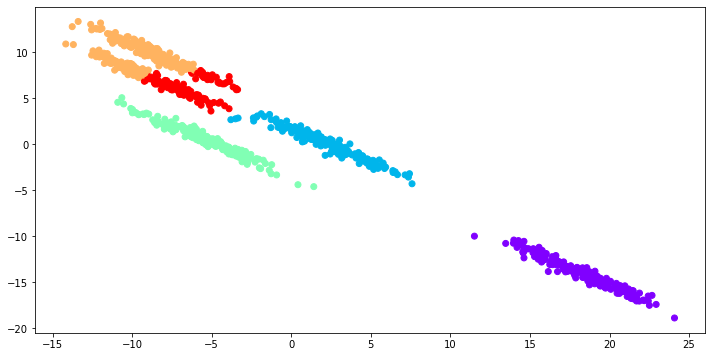

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Cluster the data into five clusters
agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
agg_cluster.fit_predict(X)

# Plot the cluster assignments
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=agg_cluster.labels_, cmap='rainbow')
plt.show()

<a name="2-3"></a>
### 2.3. DBSCAN

Please review [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Two key parameters:

+ **eps** (default=0.5). The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

+ **min_samples** (default=5). The number of samples (or total weight) in a neighborhood for a point to be considered as a `core point`. This includes the point itself.

[Some highlights](https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea) about DBSCAN clustering:
+ It stands for “density based spatial clustering of applications with noise”.
+ It does not require the user to set the number of clusters a priori.
+ It can capture clusters of complex shapes.
+ It can identify points that are not part of any cluster (very useful as `outliers` detector).
+ It's somewhat slower than K-means, but still scales to relatively large datasets.
+ It works by identifying points that are in crowded regions of the feature space, where many data points are close together (dense regions in feature space).
+ Points that are within a dense region are called `core samples` (or `core points`).
+ If there are at least `min_samples` many data points within a distance of `eps` to a given data point, that data point is classified as a `core sample`.
+ `core samples` that are closer to each other than the distance `eps` are put into the same cluster by DBSCAN.

See also [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) that standardizes features by removing the mean and scaling to unit variance, i.e., the standard score of a sample $x$ is calculated as:

$$z = \frac{x - u}{s}$$

where $u$ is the mean of the training samples or `zero` if `with_mean=False`, and $s$ is the standard deviation of the training samples or `one` if `with_std=False`.

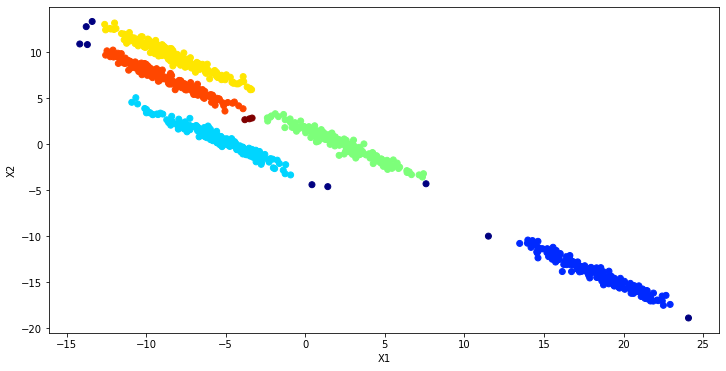

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster the data into five clusters
dbscan = DBSCAN(eps=0.08, min_samples = 3)
clusters = dbscan.fit_predict(X_scaled)

fig = plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="jet")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

After twisting `eps` and `min_samples` for some time, you can got some fairly consistent clusters, still including some noise points.
+ While DBSCAN doesn’t require setting the number of clusters explicitly, setting `eps` implicitly controls how many clusters will be found.
+ Finding a good setting for `eps` is sometimes easier after scaling the data (e.g., by StandardScaler), as using these scaling techniques will ensure that all features have similar ranges.

<a name="3"></a>
## 3. Clustering performance measurement

Сonsidering that we created the data points explicitly defining 5 clusters, we can measure performance using [sklearn.metrics.adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html). This is not frequent since in real cases we don’t have cluster labels to begin with (thus our need to apply clustering techniques). Since in this case, we do have labels, we can measure performance.

### Rand Index (RI)

The [Rand index](https://en.wikipedia.org/wiki/Rand_index) or **Rand measure** (named after William M. Rand) in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the **adjusted Rand index**. From a mathematical standpoint, Rand index is related to the accuracy, but is applicable even when class labels are not used.

The **Rand index** computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

Let $n$ be the number of samples. Then, if $C$ is a ground truth class assignment and $K$ the clustering, let us define $a$, $b$, $c$, and $d$ as:

+ $a$, the number of pairs of elements that are in the same set in $C$ and in the same set in $K$
+ $b$, the number of pairs of elements that are in different sets in $C$ and in different sets in $K$
+ $c$, the number of pairs of elements that are in the same set in $C$ and in different sets in $K$
+ $d$, the number of pairs of elements that are in different sets in $C$ and in the same set in $K$

The raw (unadjusted) **Rand index** is then given by:

$$\text{RI} = \frac{a + b}{a + b + c + d} = \frac{a + b}{\begin{pmatrix}n \\ 2\end{pmatrix}} = \frac{a + b}{\frac{n(n-1)}{2}}$$

For a better understanding of the Rand index, please watch [this video](https://youtu.be/6rjTIwn0yWI).

### Adjusted Rand Index (ARI)

However, the RI score does not guarantee that random label assignments will get a value close to zero (especially if the number of clusters is in the same order of magnitude as the number of samples). To counter this effect we can discount the expected RI $E[RI]$ of random labelings by defining the **adjusted Rand index** as follows:

$$ARI = \frac{RI - E[RI]}{max(RI) - E[RI]}$$

The **adjusted Rand index** is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

# Obtain K-means performance
print("K-means ARI = {:.3f}".format(adjusted_rand_score(y, y_pred)))

# Obtain DBSCAN performance
print("Agglom. ARI = {:.3f}".format(adjusted_rand_score(y, agg_cluster.labels_)))

# Obtain DBSCAN performance
print("DBSCAN  ARI = {:.3f}".format(adjusted_rand_score(y, clusters)))

K-means ARI = 0.685
Agglom. ARI = 0.776
DBSCAN  ARI = 0.980


<a name="4"></a>
## 4. Elbow method for K-means

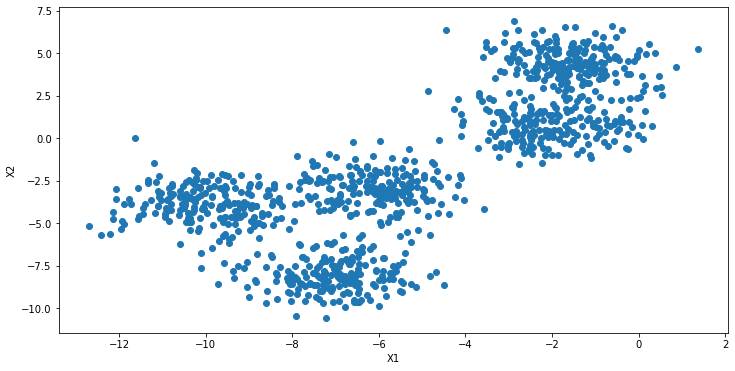

In [ ]:
# Generate new random cluster data
X, y = make_blobs(random_state=1, n_samples=1000, centers=5)

# Plot the generated data
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

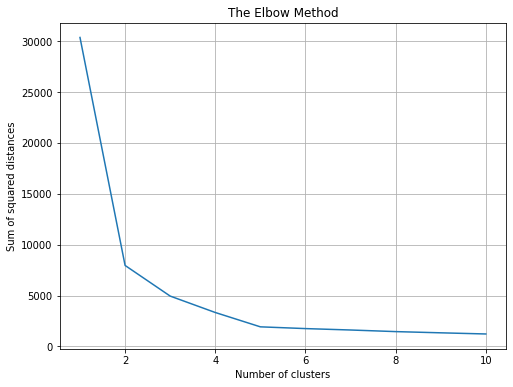

In [ ]:
# Find the appropriate number of clusters
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)    
    inertias.append(kmeans.inertia_) # inertia_ is a sum of squared distances of samples to their closest cluster center

# Plot the curve
fig = plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid()
plt.show()

**Notice the "elbows" for $k=2$ and $k=5$.**

Let's plot these clusterings:

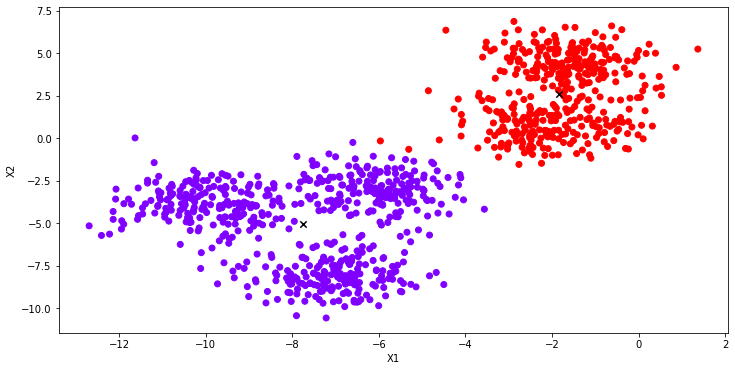

In [ ]:
# Cluster the data into two clusters
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", c="k", s=40)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

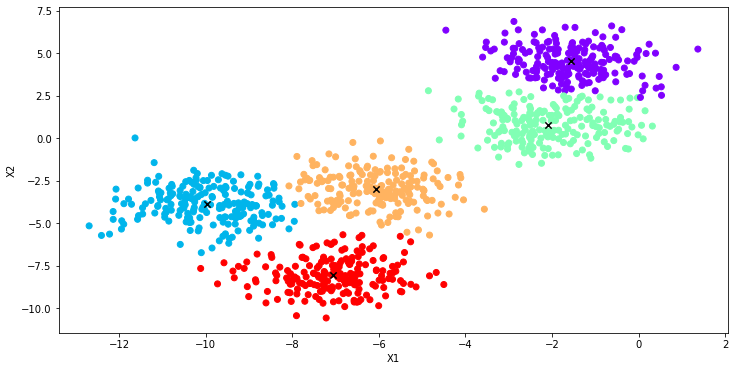

In [ ]:
# Cluster the data into five clusters
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", c="k", s=40)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

<a name="5"></a>
## 5. Dendrogram for Hierarchical clustering

Please review [scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) and [scipy.cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

Some useful parameters of a [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html):
+ **p**. The `p` parameter for `truncate_mode`.
+ **truncate_mode**. The dendrogram can be hard to read when the original observation matrix from which the linkage is derived is large. Truncation is used to condense the dendrogram. There are several modes:
    + `None`. No truncation is performed (default).
    + `'lastp'`. The last `p` non-singleton clusters formed in the linkage are the only non-leaf nodes in the linkage. All other non-singleton clusters are contracted into leaf nodes.
    + `'level'`. No more than `p` levels of the dendrogram tree are displayed. A `“level”` includes all nodes with `p` merges from the last merge.

+ **color_threshold**. For brevity, let $t$ be the `color_threshold`. Colors all the descendent links below a cluster node $k$ the same color if $k$ is the first node below the cut threshold $t$. All links connecting nodes with distances greater than or equal to the threshold are colored blue. If $t$ is less than or equal to zero, all nodes are colored blue. If `color_threshold` is `None` or `‘default’`, the threshold is set to `0.7*max(Z[:,2])`.

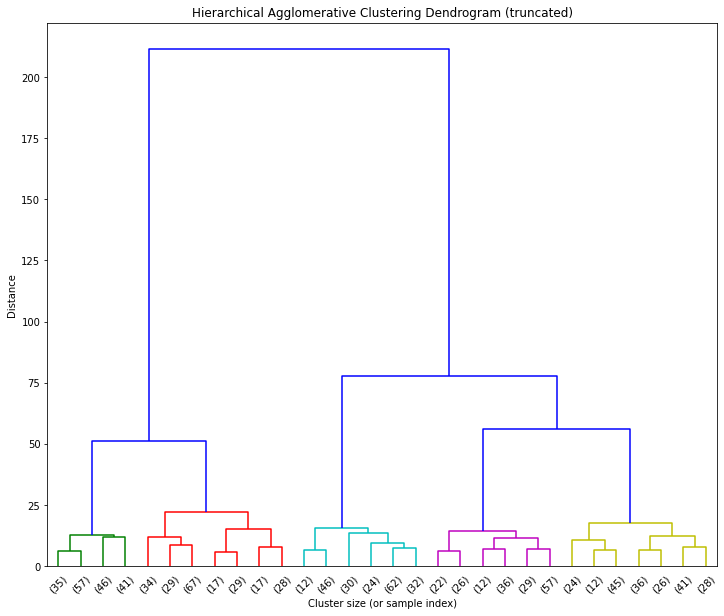

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering using SciPy's linkage() function
Z = linkage(X, method='ward')

# Plot a dendrogram
fig = plt.figure(figsize=(12, 10))
dn = dendrogram(Z, p=30, truncate_mode='lastp', color_threshold=50)
plt.title("Hierarchical Agglomerative Clustering Dendrogram (truncated)")
plt.xlabel("Cluster size (or sample index)")
plt.ylabel("Distance")
plt.show()

<a name="6"></a>
## 6. YOUR TURN

1. Find some interesting not too big `labeled` dataset (using sklearn.datasets, Kaggle, etc.).
2. Use and compare (using ARI) at least two clustering methods.
3. **(optional)** Find some `unlabeled` dataset and try to cluster the data.

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import load_wine
import seaborn as sns
import pandas as pd

In [ ]:
data = load_wine()

In [ ]:
x = data['data']
y = data['target']
df = pd.DataFrame(x)
df['target'] = y
df = df.sample(frac=1) 

In [ ]:
list(df.corr()[['target']].query("target > 0.7 or target <-0.7")[:-1].index)

[5, 6, 11]

In [ ]:
X = df.iloc[:, list(df.corr()[['target']].query("target > 0.7 or target <-0.7")[:-1].index)].values
Y = df.target.values

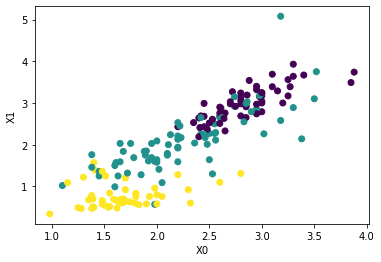

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
scaller_x = scaler.fit_transform(X)

In [ ]:
NUMBER_OF_CLUSTERS = len(data.target_names)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=500, random_state=75, init='k-means++')
kmeans.fit(scaller_x)
y_pred = kmeans.predict(scaller_x)

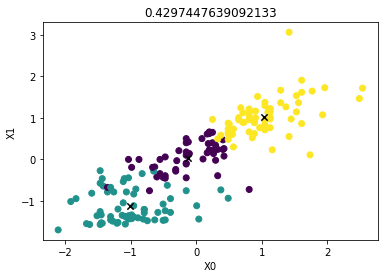

In [ ]:
plt.scatter(scaller_x[:, 0], scaller_x[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", c="k", s=40)

plt.title(adjusted_rand_score(Y, y_pred))
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

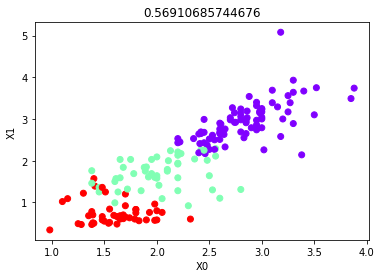

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=NUMBER_OF_CLUSTERS, affinity='euclidean', linkage='complete')  
agg_cluster.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=agg_cluster.labels_, cmap='rainbow')

plt.xlabel("X0")
plt.ylabel("X1")
plt.title(adjusted_rand_score(Y, agg_cluster.labels_))
plt.show()

In [ ]:
print("K-means ARI = {:.7f}".format(adjusted_rand_score(Y, y_pred)))
print("Agglom. ARI = {:.7f}".format(adjusted_rand_score(Y, agg_cluster.labels_)))

K-means ARI = 0.4297448
Agglom. ARI = 0.5691069


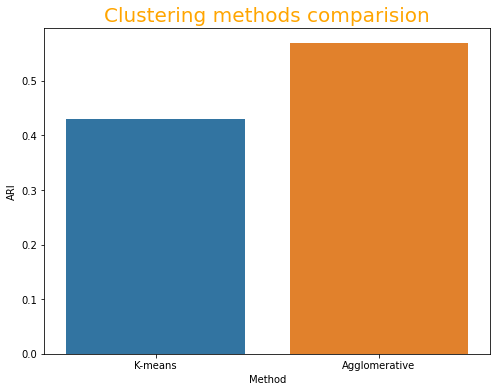

In [ ]:
indexx = ["K-means", "Agglomerative"]
scores = [adjusted_rand_score(Y, pred) for pred in [y_pred, agg_cluster.labels_]]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx, y=scores)
plt.ylabel('ARI')
plt.xlabel('Method')
plt.title('Clustering methods comparision', color='orange', fontsize=20);

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
print(data.shape)
data.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
X.shape

(200, 2)

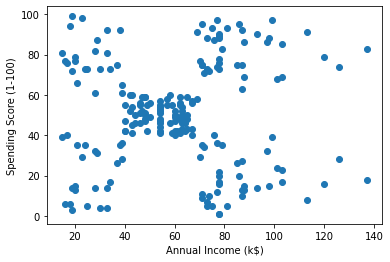

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x= scaler.fit_transform(X)

In [ ]:
res = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=10)
    kmeans.fit(scaled_x)
    res.append(kmeans.inertia_)

In [ ]:
res

[400.00000000000006,
 269.29934286898697,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.11422576528423,
 46.77838953188379,
 37.31912287833883,
 32.421683532347444,
 29.061152995353446]

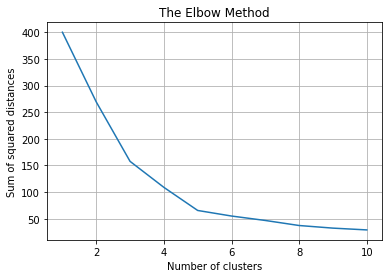

In [ ]:
plt.plot(range(1, 11), res)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=10)
pred_kmeans= kmeans.fit_predict(scaled_x)

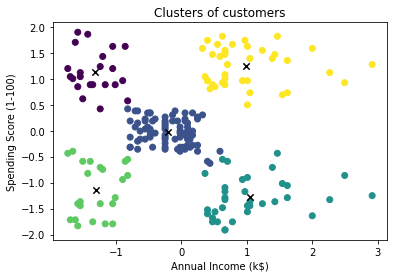

In [ ]:
plt.scatter(scaled_x[:, 0], scaled_x[:, 1], c=pred_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", c="k", s=40)

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()

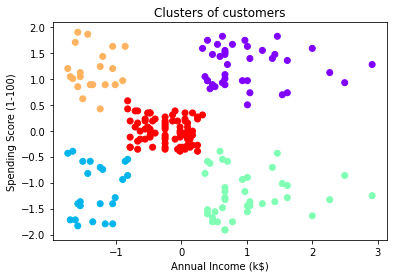

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
agg_cluster.fit_predict(scaled_x)

plt.scatter(scaled_x[:, 0], scaled_x[:, 1], c=agg_cluster.labels_, cmap='rainbow')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()